In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

# 1. 資料準備

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [6]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [7]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [8]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


In [9]:
class_names =["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]

# 建立模型

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU

In [11]:
model = Sequential()
model.add(Conv2D(
    filters=32,kernel_size=(3,3),input_shape=(32, 32,3),
    padding='same',activation='relu',name='conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool1'))
model.add(Conv2D(
    filters=64, kernel_size=(3, 3), 
    padding='same',activation='relu',name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool2'))
model.add(Flatten(name='flatten'))
model.add(Dense(1024, activation='relu',name='h1'))
model.add(Dense(10, activation='softmax',name='out'))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 pool1 (MaxPooling2D)        (None, 16, 16, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 64)        18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 h1 (Dense)                  (None, 1024)              4195328   
                                                                 
 out (Dense)                 (None, 10)                1

In [13]:
model.input  

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'conv1_input')>

In [14]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'out')>

# 訓練模型

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [16]:
#train_history=model.fit(
#    x=x_train_normalize,y=y_train_onehot,
#    validation_split=0.2,batch_size=200,epochs=10,verbose=2)

# 評估模型準確率

In [17]:
score=model.evaluate(x_test_normalize , y_test_onehot,verbose=2)

313/313 - 10s - loss: 2.3005 - acc: 0.1051 - 10s/epoch - 33ms/step


# 建立輸出特徵圖(Feature Map)的模型

In [18]:
model.input

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'conv1_input')>

In [19]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'out')>

In [20]:
model.layers

In [21]:
DISPLAY_LAYER=4

In [22]:
output_layers = [layer.output for layer in model.layers[:DISPLAY_LAYER]] 
output_layers

[<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv1')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'pool1')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'pool2')>]

In [23]:
from tensorflow.keras import models
feature_map_model = models.Model(inputs=model.input,outputs=output_layers)

In [24]:
feature_map_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_input (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 pool1 (MaxPooling2D)        (None, 16, 16, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 64)        18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 8, 8, 64)          0         
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [25]:
feature_map_model.input 

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'conv1_input')>

In [26]:
feature_map_model.output 

[<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv1')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'pool1')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'pool2')>]

#設定要顯示特徵圖的影像

In [27]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

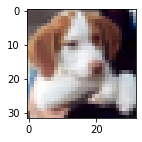

In [28]:
IMG_ID=16
plot_image(x_test_image[IMG_ID])

In [29]:
x_test_image[IMG_ID].shape

(32, 32, 3)

In [30]:
input_4d_img=(x_test_image[IMG_ID]
       .reshape(-1,32,32,3)
       .astype('float32')) / 255

In [31]:
input_4d_img.shape

(1, 32, 32, 3)

# 產生特徵圖(Feature Map)

訓練前，產生特徵圖

In [32]:
feature_maps = feature_map_model.predict(input_4d_img)

訓練模型

In [33]:
train_history=model.fit(
  x=x_train_normalize,y=y_train_onehot,
  validation_split=0.2,batch_size=200,epochs=10,verbose=2)

Epoch 1/10
200/200 - 4s - loss: 1.5359 - acc: 0.4510 - val_loss: 1.2447 - val_acc: 0.5695 - 4s/epoch - 19ms/step
Epoch 2/10
200/200 - 2s - loss: 1.1335 - acc: 0.6022 - val_loss: 1.0680 - val_acc: 0.6298 - 2s/epoch - 9ms/step
Epoch 3/10
200/200 - 2s - loss: 0.9683 - acc: 0.6611 - val_loss: 0.9847 - val_acc: 0.6597 - 2s/epoch - 10ms/step
Epoch 4/10
200/200 - 2s - loss: 0.8599 - acc: 0.6984 - val_loss: 0.9181 - val_acc: 0.6828 - 2s/epoch - 9ms/step
Epoch 5/10
200/200 - 2s - loss: 0.7798 - acc: 0.7293 - val_loss: 0.8999 - val_acc: 0.6901 - 2s/epoch - 10ms/step
Epoch 6/10
200/200 - 2s - loss: 0.6861 - acc: 0.7616 - val_loss: 0.8786 - val_acc: 0.6994 - 2s/epoch - 9ms/step
Epoch 7/10
200/200 - 2s - loss: 0.6039 - acc: 0.7898 - val_loss: 0.8627 - val_acc: 0.7083 - 2s/epoch - 10ms/step
Epoch 8/10
200/200 - 2s - loss: 0.5220 - acc: 0.8210 - val_loss: 0.8830 - val_acc: 0.7097 - 2s/epoch - 9ms/step
Epoch 9/10
200/200 - 2s - loss: 0.4352 - acc: 0.8514 - val_loss: 0.8704 - val_acc: 0.7160 - 2s/epoch

In [34]:
score=model.evaluate(x_test_normalize , y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.9439 - acc: 0.7068 - 722ms/epoch - 2ms/step


訓練後，產生特徵圖

In [35]:
feature_maps_trained = feature_map_model.predict(input_4d_img)  

In [36]:
len(feature_maps)

4

產生特徵圖(Feature Map)每一層名稱

In [37]:
layer_names = []
for layer in feature_map_model.layers[1:DISPLAY_LAYER+1]:
    layer_names.append(layer.name)
    print(layer.name) 

conv1
pool1
conv2
pool2


In [38]:
for i in range(len(feature_maps)):
    print('layer',i,' ',
       layer_names[i],':',
       feature_maps[i].shape)

layer 0   conv1 : (1, 32, 32, 32)
layer 1   pool1 : (1, 16, 16, 32)
layer 2   conv2 : (1, 16, 16, 64)
layer 3   pool2 : (1, 8, 8, 64)


# 顯示第0層特徵圖

In [39]:
layer_names[0]

'conv1'

In [40]:
feature_maps[0].shape

(1, 32, 32, 32)

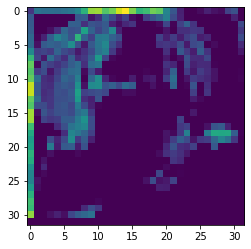

In [41]:
import matplotlib.pyplot as plt
plt.imshow(feature_maps[0][0, :, :, 0], cmap='viridis')
plt.show()  

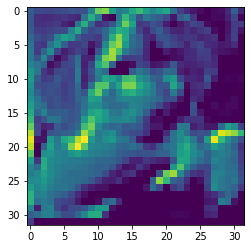

In [42]:
import matplotlib.pyplot as plt
plt.imshow(feature_maps[0][0, :, :, 12], cmap='viridis')
plt.show()  

# 顯示第1層特徵圖

In [43]:
layer_names[1]

'pool1'

In [44]:
feature_maps[1].shape

(1, 16, 16, 32)

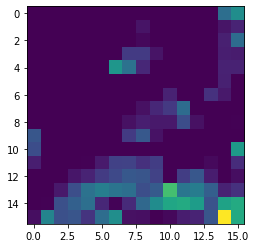

In [45]:
import matplotlib.pyplot as plt
plt.imshow(feature_maps[1][0, :, :, 2], cmap='viridis')
plt.show() 

# 顯示每一層feature_maps

In [46]:
import math
def display_feature_maps(
    feature_maps,layer_names,idx,
    fig_width=12,n_cols=10,p_cmap='viridis'):
   print('layer',idx,layer_names[idx],feature_maps[idx].shape) 
   n_feature_maps = feature_maps[idx].shape[3]
   n_rows = math.ceil(n_feature_maps / n_cols)
   fig = plt.gcf().set_size_inches(fig_width,n_rows*1.2 )
   for i in range(n_feature_maps):
       ax=plt.subplot(n_rows,n_cols, 1+i)
       ax.set_xticks([]);ax.set_yticks([])
       ax.imshow(feature_maps[idx][0, :, :, i],cmap=p_cmap)
   plt.show()

#顯示訓練前後的特徵圖

卷積層1

layer 0 conv1 (1, 32, 32, 32)


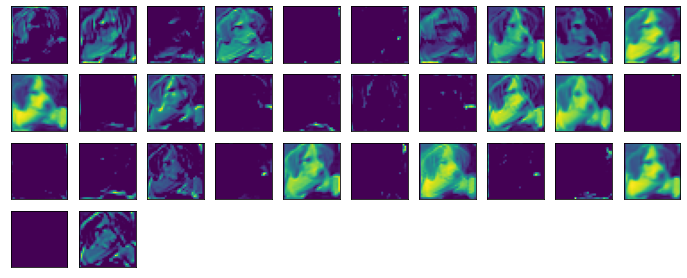

In [47]:
display_feature_maps(feature_maps,layer_names,idx=0) 

layer 0 conv1 (1, 32, 32, 32)


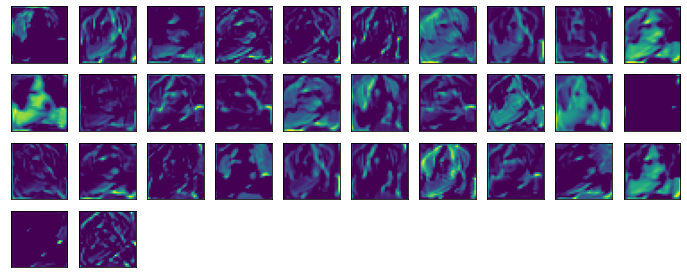

In [48]:
display_feature_maps(feature_maps_trained,layer_names,idx=0)

池化層1

layer 1 pool1 (1, 16, 16, 32)


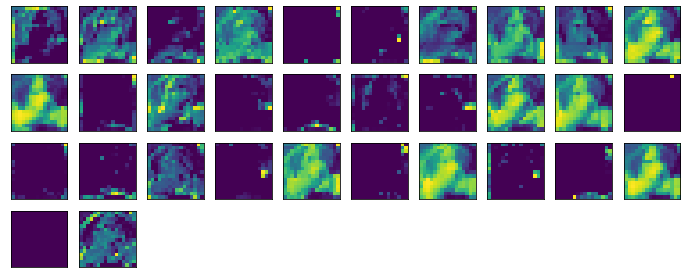

In [49]:
display_feature_maps(feature_maps,layer_names,idx=1)

layer 1 pool1 (1, 16, 16, 32)


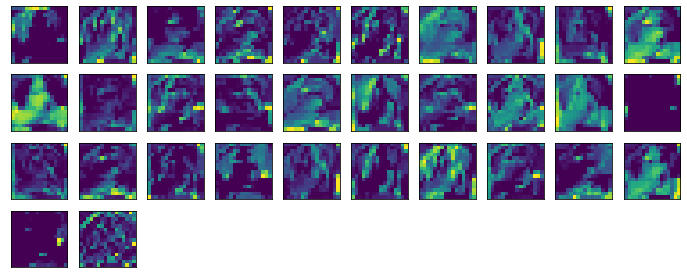

In [50]:
display_feature_maps(feature_maps_trained,layer_names,idx=1)

卷積層2

layer 2 conv2 (1, 16, 16, 64)


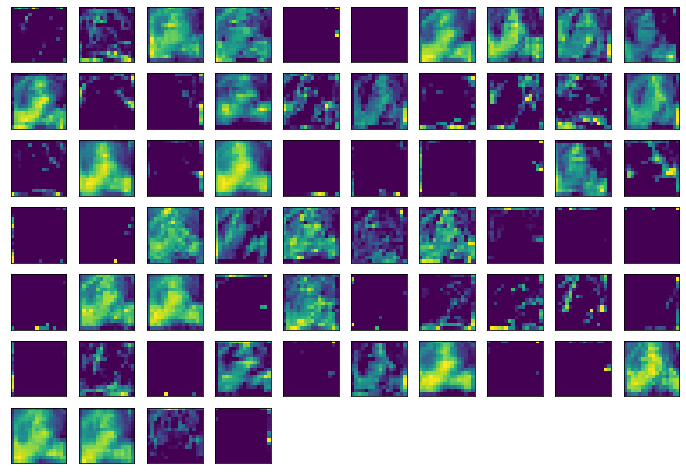

In [51]:
display_feature_maps(feature_maps,layer_names,idx=2) 

layer 2 conv2 (1, 16, 16, 64)


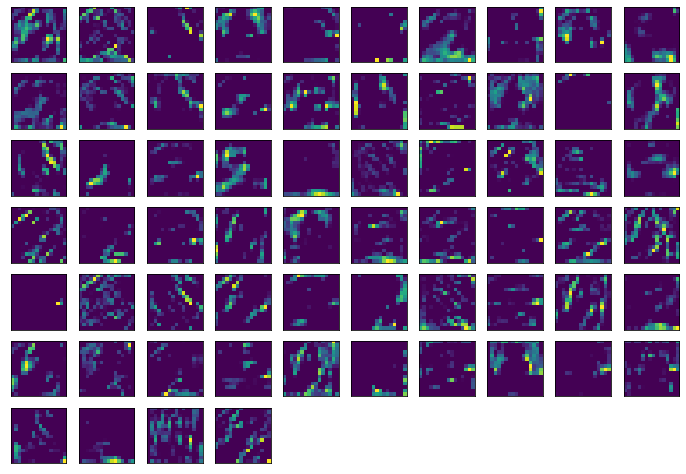

In [52]:
display_feature_maps(feature_maps_trained,layer_names,idx=2) 

池化層2

layer 3 pool2 (1, 8, 8, 64)


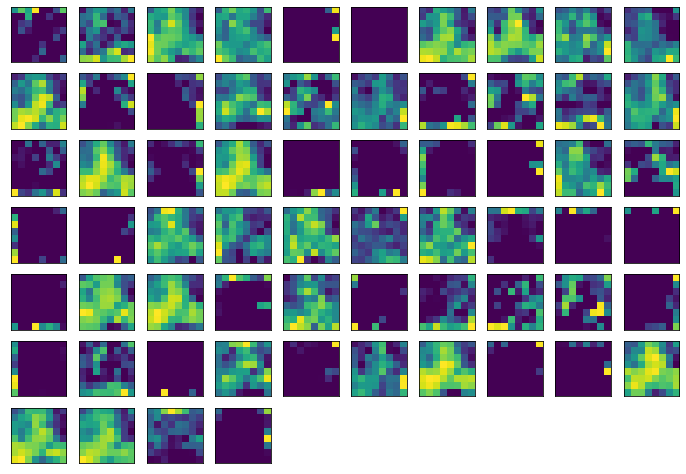

In [53]:
display_feature_maps(feature_maps,layer_names,idx=3)

layer 3 pool2 (1, 8, 8, 64)


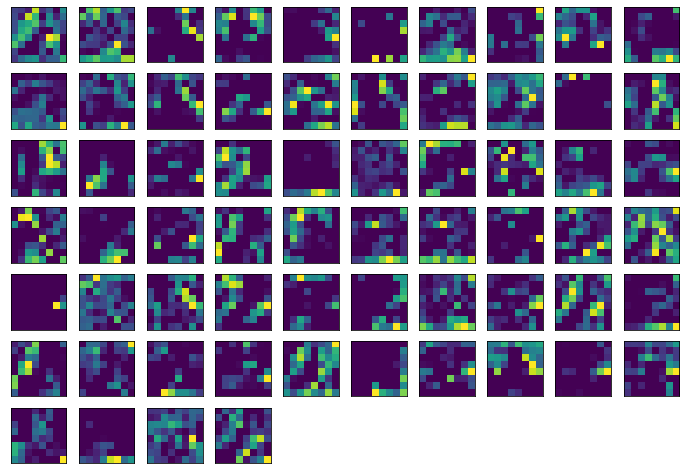

In [54]:
display_feature_maps(feature_maps_trained,layer_names,idx=3)